In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
import matplotlib
#matplotlib.use('nbagg')
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
import numpy as np

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)

In [6]:
engine.execute('SELECT * FROM measurements LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65),
 (2, 'USC00519397', '2010-01-02', 0.0, 63),
 (3, 'USC00519397', '2010-01-03', 0.0, 74),
 (4, 'USC00519397', '2010-01-04', 0.0, 76),
 (5, 'USC00519397', '2010-01-07', 0.06, 70)]

In [7]:
engine.execute('SELECT * FROM stations LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [8]:
inspector = inspect(engine)
inspector.get_table_names()

['measurements', 'stations']

In [9]:
# Reflect Database into ORM classes (Station and Measurement)
Base = automap_base()
Base.prepare(engine, reflect=True)
Station = Base.classes.stations
Measurement = Base.classes.measurements

In [10]:
session = Session(engine)

## Precipitation Analysis

In [11]:
#Design a query to retrieve the last 12 months of precipitation data.

# First, get the most recent date
session.query(Measurement.date).\
    order_by(Measurement.date.desc()).first()

('2017-08-23')

In [12]:
# Most recent date in the table is 2017-08-23, so need to get previous 12 months (365 days)
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)  
print(query_date)


2016-08-23


In [13]:
# Query for last 12 months of precipitation data
prcp_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > query_date).\
    order_by(Measurement.date).all()

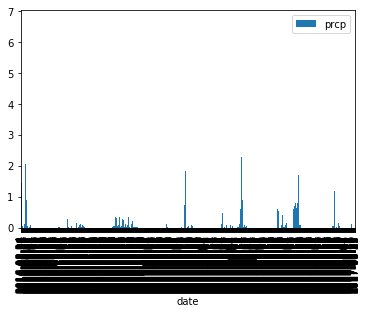

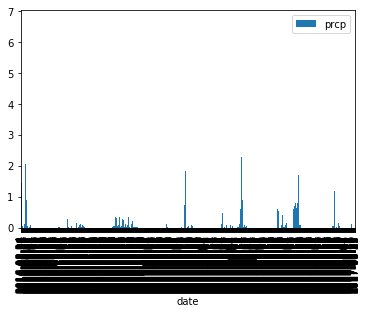

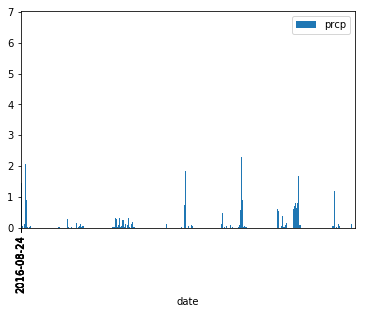

In [32]:
# Plot the Results in a Matplotlib bar chart (TO FINISH)

df_prcp = pd.DataFrame(prcp_data, columns=['date', 'prcp'])
df_prcp.set_index('date', inplace=True)
df_prcp.plot.bar()
plt.xticks(np.arange(5))
#plt.tight_layout()
plt.show()


In [15]:
# Use Pandas to print the summary statistics for the precipitation data
## using describe command

df.describe

<bound method NDFrame.describe of             prcp
date            
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.28
2016-08-24  1.22
2016-08-24  2.15
2016-08-24  1.45
2016-08-25  0.08
2016-08-25  0.08
2016-08-25  0.00
2016-08-25  0.00
2016-08-25  0.21
2016-08-25  0.06
2016-08-25  0.11
2016-08-26  0.00
2016-08-26  0.03
2016-08-26  0.02
2016-08-26  0.04
2016-08-26  0.00
2016-08-26  0.01
2016-08-27  0.00
2016-08-27  0.18
2016-08-27  0.02
2016-08-27  0.00
2016-08-27  0.12
2016-08-28  0.01
2016-08-28  0.14
2016-08-28  0.14
2016-08-28  0.14
2016-08-28  0.60
2016-08-28  2.07
...          ...
2017-08-15  0.00
2017-08-15  0.06
2017-08-15  0.32
2017-08-15  0.42
2017-08-16  0.00
2017-08-16  0.07
2017-08-16  0.12
2017-08-16  0.42
2017-08-17  0.00
2017-08-17  0.05
2017-08-17  0.01
2017-08-17  0.13
2017-08-18  0.00
2017-08-18  0.00
2017-08-18  0.06
2017-08-19  0.00
2017-08-19  0.00
2017-08-19  0.09
2017-08-20  0.00
2017-08-20  0.01
2017-08-21  0.00
2017-08-21  0.02
2017-08-21  0.56
2017-08-22  0.

## Station Analysis

In [59]:
#Design a query to calculate the total number of stations
session.query(func.count(Station.station)).all() 

[(9)]

In [77]:
# Design a query to find the most active stations.
## List the stations and observation counts in descending order
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [80]:
## Which station has the highest number of observations?
session.query(Measurement.station).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).first()

('USC00519281')

In [23]:
# Design a query to retrieve the last 12 months of temperature observation data (tobs).
## Filter by the station with the highest number of observations.
station_data = session.query(Measurement.tobs, func.count(Measurement.tobs)).\
    filter(Measurement.date > query_date, Measurement.station == "USC00519281" ).\
    group_by(Measurement.tobs).\
    order_by(Measurement.tobs.desc()).all()


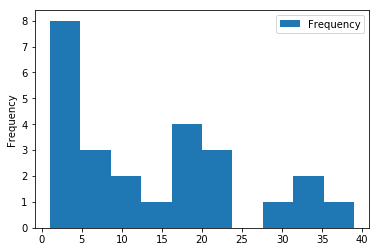

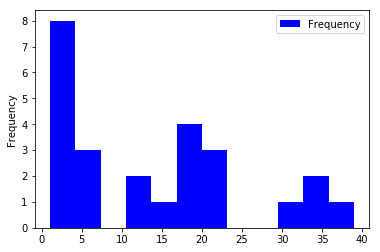

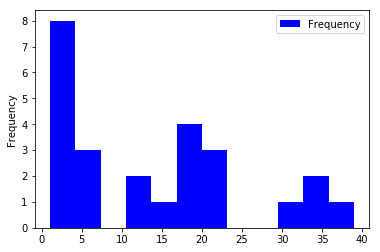

In [27]:
## Plot the results as a histogram with bins=12.
df_station = pd.DataFrame(station_data, columns=['tobs', 'Frequency'])
df_station.set_index('tobs', inplace=True)
df_station.plot.hist(bins=12, histtype='bar', align='mid', orientation='vertical', color="Blue")
plt.show()



## Temperature Analysis

In [ ]:
# Write a function called calc_temps that will accept a start date and end date in the format %Y-%m-%d
# and return the minimum, average, and maximum temperatures for that range of dates.

def calc_temps(start_date, end_date):
        session.query(Measurement.)